In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator


C:\Users\Manvi Gupta\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [19]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [20]:
ytrain=train["label"]

In [21]:
xtrain=train.drop("label", axis=1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

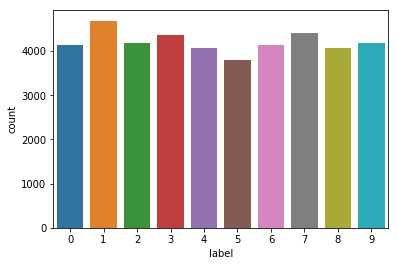

In [8]:
g=sns.countplot(ytrain)
ytrain.value_counts()

In [9]:
xtrain.isnull().any().describe()
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [22]:
xtrain=xtrain/255.0
test=test/255.0

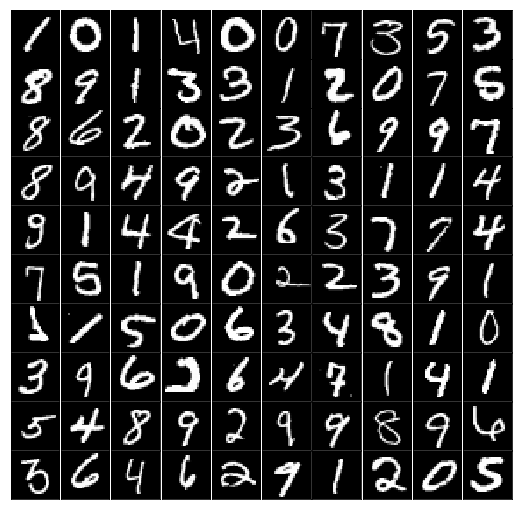

In [11]:
from glob import iglob
fig, axes = plt.subplots(10,10,figsize=(9,9),
 subplot_kw={"xticks":[], "yticks":[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(xtrain.values.reshape(-1, 28, 28, 1)[i][:,:,0],cmap="gray")

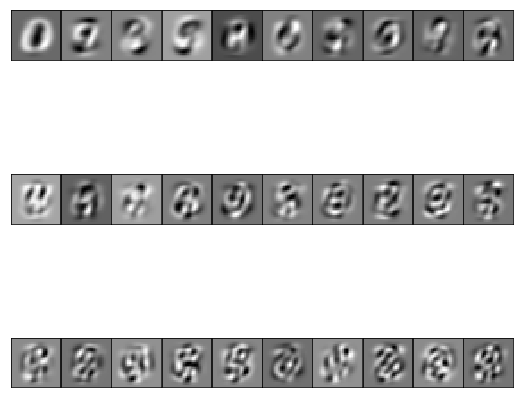

In [12]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
digits_pca = PCA(n_components=0.8)
digits_pca.fit(xtrain)
fig, axes = plt.subplots(3,10,figsize=(9,9),
 subplot_kw={"xticks":[], "yticks":[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(digits_pca.components_[i].reshape(28, 28),cmap="gray")

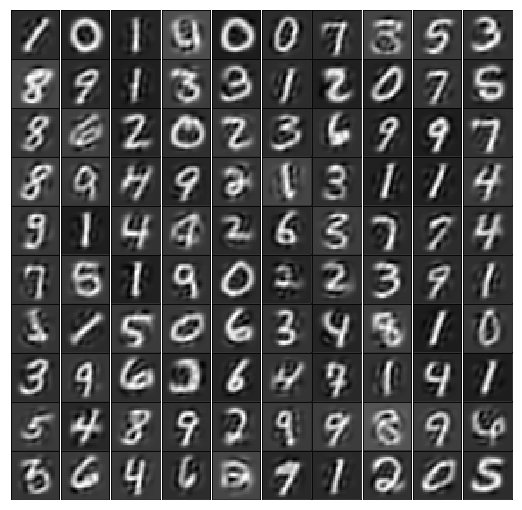

In [13]:
components = digits_pca.transform(xtrain)
projected = digits_pca.inverse_transform(components)
fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(28,28),cmap="gray")

In [23]:
ytrain=to_categorical(ytrain, num_classes=10)

In [24]:
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size = 0.2, random_state = 2)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [ ]:
from sklearn.metrics import accuracy_score
ypred=classifier.predict(xval)
# ypred=np.argmax(ypred, axis=1)
# ytrue=np.argmax(yval, axis=1)
result2 = accuracy_score(yval,ypred)

In [ ]:
result2

In [ ]:
results=classifier.predict(test)
results = np.argmax(results,axis = 1)

In [ ]:
results

In [26]:
xtrain=xtrain.values.reshape(-1,28, 28, 1)
#test=test.values.reshape( -1,28, 28, 1)

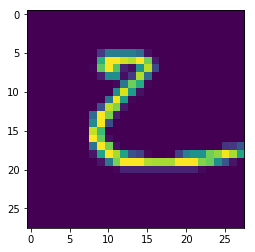

In [27]:
g=plt.imshow(xtrain[0][:,:,0])